<a href="https://colab.research.google.com/github/Changho0514/web1/blob/main/1_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DCGAN 실습

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


pytorch 쓸거고, import를 할거임

In [3]:
import torch 
import torch.nn as nn
import torch.optim as optim # pytorch 에서 정의한 수 많은 optimization function 들이 들어 있습니다. 최적화 모듈
from torch.utils import data # 데이터 셋, 데이터 로더 있는데, 데이터 로더는 컴퓨터의 디스크/메모리가 있는데 메모리는 8gb, 16gb 처럼 작다. 디스크는 테라단위까지. 우리는 빅데이터 쓰니까 연산할 때 디스크에서 조금씩 조금씩 가져와야한다.

import torchvision # 이미지 관련 처리, Pretrained Model 관련된 Package 입니다. pytorch 안에서 nlp도 할수있는데, 여기선 불러올 때 augmentation도 할 수 있게끔 처리해줌
import torchvision.transforms as T # 이미지 처리 (Vison) 관련된 transformation이 정의 되어 있습니다. 다운로드 받을 때 설정
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  #  colab에서는 필요없긴한데 gpu가 서버상에서 여러개 있을 때 0번만 쓰겠다 하는 느낌.

## Quiz

In [5]:
#quiz 1 (torch.permute)

sample_array = np.random.randn(2000, 64, 64, 3)  #np로 randn -> 중점이 0이고 variance가 1인 sampling. 
sample = torch.from_numpy(np.array(sample_array)) # 행렬을 만들고, torch 텐서로 바꿀것
# sample => (2000, 64, 64, 3).  

# 위 sample 을 (2000, 3, 64, 64)로 바꿔보세요.
# 나의 답
# sample_array1 = np.random.randn(2000, 3, 64, 64)
# sample_1 = torch.from_numpy(np.array(sample_array1))

#정답 -> 3 dimension을 앞으로 가져와야 함. 
sample_1 = sample.permute(0, 3, 1, 2) # dimension 바꿔주는 역할 0 dimension은 상관 없음

print(sample_1.size())

torch.Size([2000, 3, 64, 64])


H, W, C 있을 때
img = ---

C, H, W 로 바꿔주고 싶을 때 
.permute() 을 많이 쓴다

In [6]:
# 위 sample 을 (2000, 64, 3, 64)로 바꿔보세요.
sample_2 = sample.permute(0, 1, 3, 2)
print(sample_2.size())

torch.Size([2000, 64, 3, 64])


In [ ]:
# hint
a = torch.FloatTensor(5,20,100)
a1 = a.permute(0,2,1)
print(a1.shape)
a2 = a.permute(1,2,0)
print(a2.shape)

torch.Size([5, 100, 20])
torch.Size([20, 100, 5])


In [9]:
#quiz 2 (torch.view)

sample = torch.from_numpy(np.array(sample_array))
# sample => (2000, 64, 64, 3).  

#위 sample 을 (2000, 64*64*3)으로 바꿔보세요. 
# 나의 답
sample_1 = sample.view(-1, 64*64*3) 
print(sample_1.size())

# 정답
sampel_1 = sample.view(2000, -1)

#위 sample 을 (2000*64, 64*3)로 바꿔보세요.
# 정답
sample_2 = sample.view(2000*64, -1)
print(sample_2.size())

torch.Size([2000, 12288])
torch.Size([128000, 192])


In [10]:
# hint
a = torch.FloatTensor(5,20,100)
a1 = a.view(2, 10, -1)
print(a1.shape)
a2 = a.view(-1,10, 200)
print(a2.shape)

torch.Size([2, 10, 500])
torch.Size([5, 10, 200])


## Convolution Layer

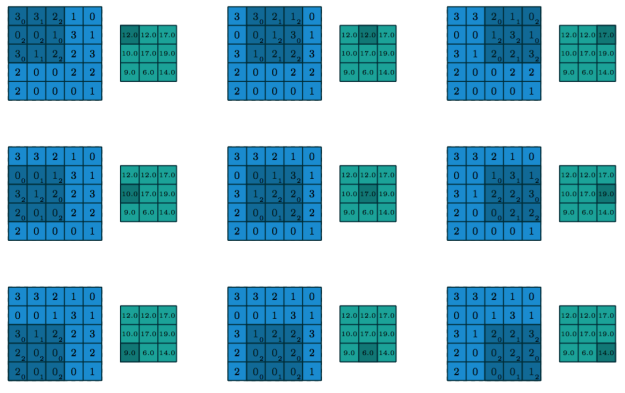

In [19]:
#quiz 3 (torch.nn.conv)
# nn.Conv2d(in_channel, out_channel, filter_size, stride, padding)
input1 = torch.zeros(16, 3, 64, 64) # 이 모양의 0배열이 생김
conv1 = nn.Conv2d(3, 512, 3, 1, 1) # convolution layer 하나를 만듬. 모듈이라고도 부름. 첫 디멘션에 왜 3이 들어가야 할까?=> 3개의 채널이니까. output이 512. 3은 kernel, 나머지 stride, padding 순 output spatial dimention이 32*32-> size가 유지되고, channel만 달라짐 
conv2 = nn.Conv2d(512, 128, 5, 2, 2) # quiz /// # input 채널이 512이어야하고 output은 128이어야 하니까. 그리고 64-> 32로 줄어들어야 한다. stride는 2 padding은 5니까 2가 필요

out = conv1(input1)
out = conv2(out)
print(out.size())
# print(out.size) = (16, 128, 32, 32)

torch.Size([16, 128, 32, 32])


In [26]:
#quiz 4 (torch.nn.conv)
# nn.Conv2d(in_channel, out_channel, filter_size, stride, padding)
input1 = torch.zeros(16, 3, 64, 64)
conv1 = nn.Conv2d(3, 64, 3, 1, 1) # 3, 1, 1이 나왔으니까 64 64가 유지 되겠지
conv2 = nn.Conv2d(64, 512, 7, 4, 3) # quiz

out = conv1(input1)
out = conv2(out)
print(out.size())
# print(out.size) = (16, 512, 16, 16)

torch.Size([16, 512, 16, 16])


## Transpose Convolutional Layer

![Transpose Convolution](./imgs/1_Deconv.gif)

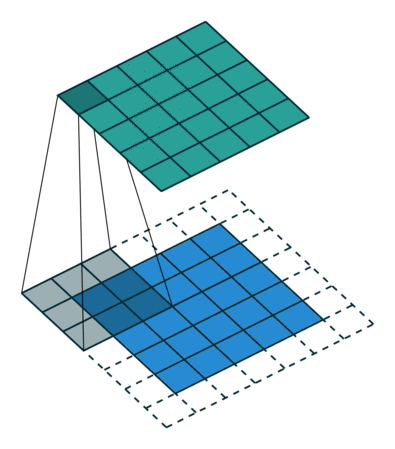

In [28]:
#quiz 5 (torch.nn.ConvTranspose2d)
# nn.Conv2d(in_channel, out_channel, filter_size, stride, pad)
input1 = torch.zeros(16, 100, 1, 1)
conv1 = nn.ConvTranspose2d(100, 512, 4, 2, 1)
conv2 = nn.ConvTranspose2d(512, 256, 4, 2, 1) # quiz  

out = conv1(input1)
print(out.size())
out = conv2(out)
print(out.size())
# print(out.size()) = (16, 256, 4, 4) # 맨 앞에 있는건 batch 사이즈. 한번에 몇개나 제공할 지

torch.Size([16, 512, 2, 2])
torch.Size([16, 256, 4, 4])


2*2 를 4*4로 늘린다면 kernel, stride, padding이 각각 4, 2, 1이 많이 사용된다.
그 이유 다시 생각해보기

# CIFAR10 DCGAN
## Data Loader 불러오기

In [30]:
def CIFAR10_DATA(root='./data/', download =True, batch_size=64, num_worker=1):
    print ("[+] Get the CIFAR-10 DATA")
    """
    torchvision.dataset 에는 우리가 많이 사용하는 데이터들을 쉽게 사용할 수 있도록 되어 있습니다.
    """
    transform = T.Compose([T.ToTensor(), # 얻어낸 데이터를 pytorch가 계산 할 수 있는 Tensor 로 변환해 줍니다. 
                           T.Normalize(mean=(0.5, 0.5, 0.5), 
                                       std=(0.5, 0.5, 0.5))])# tensor로 바꾼후 정규화 실행. 각 픽셀값의 rgb채널이라 3개씩 있는거. ex) 값이 0.8 -> (0.8-0.5)/0.5 데이터셋이 0-1까지의 값
    
    cifar10_train = datasets.CIFAR10(root = root,  #root 는 데이터의 저장 위치 입니다. 다운로드 하면 root에 저장.
                                 train = True, #Train 은 이 데이터가 train 데이터인지 아닌지에 대한 정보입니다. 
                                 transform = transform,
                                 download = True)  # 데이터를 다운로드 할지 여부를 물어봅니다. 
    cifar10_test = datasets.CIFAR10(root = root,
                                train = False,  # Test Data를 가져오기에 Train =False 를 줘야 합니다. 
                                transform = transform,
                                download = True)
    """
    Data Loader 는 데이터와 batch size의 정보를 바탕으로 매 iteration 마다 주어진 데이터를 원하는 batch size 만큼 반환해주는 iterator입니다. 
    * Practical Guide : Batch size 는 어느정도가 좋나요? -- 클 수록 좋다는 소리가 있습니다. 하지만 gpu memeory 사이즈 한계에 의해 기본적으로 batch size 가 
    커질 수록 학습에 사용되는 gpu memory 사이즈가 큽니다. (Activation map을 저장해야 하기 때문입니다.) 기본적으로 2의 배수로 저장하는 것이 좋습니다.(Bit size 관련) 
    """
    trainDataLoader = data.DataLoader(dataset = cifar10_train,  # DataSet은 어떤 Data를 제공해 줄지에 대한 정보입니다. 여기서는 Training DATA를 제공합니다. 
                                      batch_size = batch_size, # batch size 정보를 꼭 줘야 합니다. 한 Batch 당 몇 개의 Data 를 제공할지에 대한 정보입니다. 
                                      shuffle =True, # Training의 경우 Shuffling 을 해주는 것이 성능에 지대한 영향을 끼칩니다. 꼭 True 를 줘야 합니다. 학습데이터는 무조건 True. 안해주면 overfitting될수도
                                      num_workers = num_worker) # num worker의 경우 데이터를 로드하는데 worker를 얼마나 추가하겠는가에 대한 정보입니다. 

    testDataLoader = data.DataLoader(dataset = cifar10_test, # Test Data Loader 이므로 Test Data를 인자로 전달해줍니다.
                                     batch_size = batch_size, # 마찬가지로 Batch size 를 넣어줍니다. 
                                     shuffle = False, # shuffling 이 굳이 필요하지 않으므로 false를 줍니다. 
                                     num_workers = num_worker) #
    print ("[+] Finished loading data & Preprocessing")
    return cifar10_train, cifar10_test, trainDataLoader, testDataLoader

In [31]:
trainDset, testDset, trainDataLoader, testDataLoader = CIFAR10_DATA(batch_size=64, num_worker=4)  # Data Loader 를 불러 옵니다. 

[+] Get the CIFAR-10 DATA


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified
[+] Finished loading data & Preprocessing


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## CIFAR10 Data 확인

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


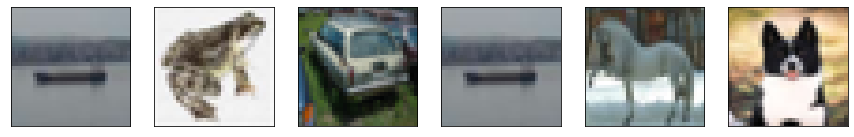

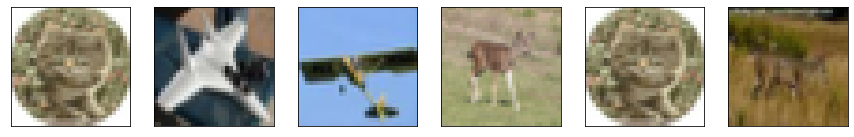

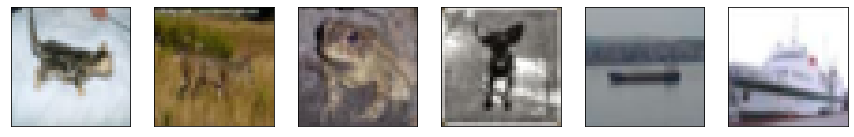

In [32]:
def show_images(image, n_row):
    for _ in range(n_row):  
        index=np.random.choice(64, 6)
        images =image.numpy()[index]
        plt.figure(figsize=(15,90))    
        for a in range(161, 167):    
            plt.subplot(a)
            plt.imshow(images[(a-161)].transpose(1,2,0))
            plt.xticks([])
            plt.yticks([])    
        plt.show()  

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1) # 0-1 데이터를 -1 ~ 1스케일로 바꿔줬는데, 이걸 다시 저장할때 다시 0-1스케일로 바꿔주려함. .clamp는 0보다 작거나 1보다 큰 값을 잘라주겠다는 뜻.
        
for i, (image,_) in enumerate(trainDataLoader):
    show_images(denorm(image.squeeze()), 3)
    break

## Generator, Discriminator

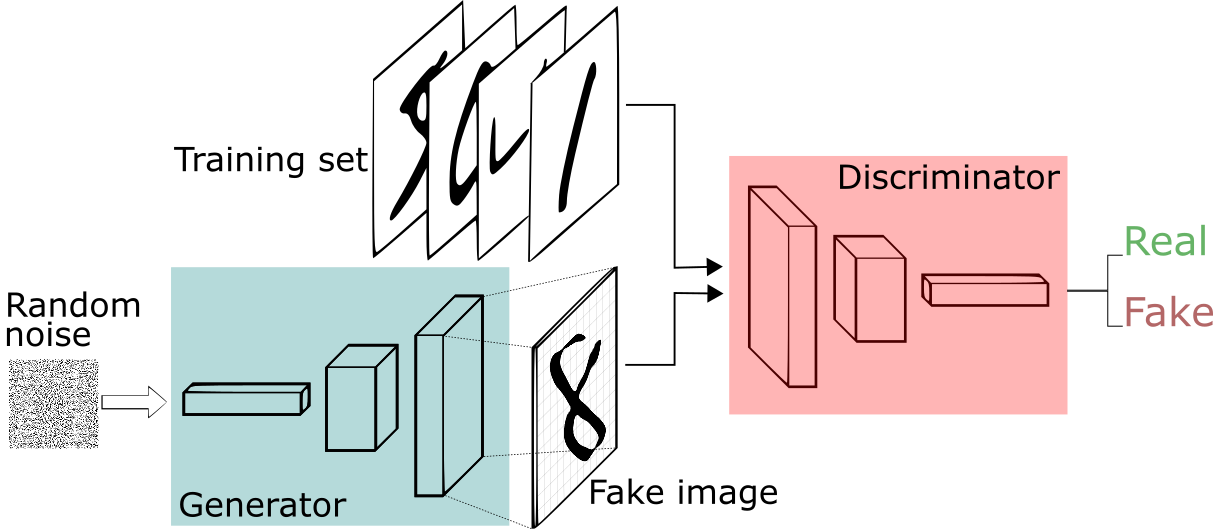

랜덤 노이즈 하나 뽑아줌  
discriminator가 진짜라고 생각하는 방향으로 update시킴  
generator는 점점더 진짜같은 이미지를 내보냄  
discriminator는 training set을 보면서 진짜를 가릴수 있는 능력이 있음

# DCGAN

In [35]:
'''
코드 단순화를 위한 함수들을 정의해 줍니다.
'''

def conv(c_in, c_out, k_size, stride=2, pad=1, bn=True, activation='lrelu'):
    """ 
    코드 단순화를 위한 convolution block 생성을 위한 함수입니다.
    Conv -> Batchnorm -> Activation function 으로 이어지는 일련의 레이어를 생성합니다.
    """
    # 리스트로 만들기
    layers = []
    
    # Conv.
    # convolution block을 하나 만든다
    # convolution module을 하나 만들고, 
    layers.append(nn.Conv2d(c_in, c_out, k_size, stride, pad, bias=False))


    # Batchnorm 
    # 이걸 쓸 때 parameter로 c_out, 받을 channel의 갯수를 받아줘야 한다. 
    if bn:
        layers.append(nn.BatchNorm2d(c_out))
    
    # Activation
    # 셋중 하나의 activation을 거쳐서 만들어라
    if activation == 'lrelu':
        layers.append(nn.LeakyReLU(0.2))
    elif activation == 'relu':
        layers.append(nn.ReLU())
    elif activation == 'tanh':
        layers.append(nn.Tanh())
                
    return nn.Sequential(*layers) # *은 해체시킨다는 표현임. sequential 자체가 하나의 모듈이 됨. conv, batchnorm, activation을 모두 거친 하나의 모듈.
  
def deconv(c_in, c_out, k_size, stride=2, pad=1, bn=True, activation='lrelu'):
    """ 
    코드 단순화를 위한 deconvolution block 생성을 위한 함수입니다.
    Deconv -> Batchnorm -> Activation function 으로 이어지는 일련의 레이어를 생성합니다.
    """
    
    layers = []
    
    # Deconv.
    layers.append(nn.ConvTranspose2d(c_in, c_out, k_size, stride, pad, bias=False))
    
    # Batchnorm
    if bn:
      layers.append(nn.BatchNorm2d(c_out)) #    
    # Activation
    if activation == 'lrelu':
        layers.append(nn.LeakyReLU(0.2))
    elif activation == 'relu':
        layers.append(nn.ReLU())
    elif activation == 'tanh':
        layers.append(nn.Tanh())
                
    return nn.Sequential(*layers)

In [36]:
class Generator(nn.Module):
    """Generator"""
    def __init__(self, z_dim=256, image_size=32, conv_dim=64):
        # 총 4개의 deconv로 이루어짐. 
        super(Generator, self).__init__()
        self.fc = deconv(z_dim, conv_dim*4, int(image_size/8), 1, 0, bn=False) # (B, 256, 4, 4)
        self.deconv1 = deconv(256, 128, 4, activation='relu')   # (B, 128, 8, 8)
        self.deconv2 = deconv(128, 64, 4, activation='relu')   # (B, 64, 16, 16)
        self.deconv3 = deconv(64, 3, 4, bn=False, activation='tanh') # (B, 3, 32, 32) #tanh 쓴 이유는 
    
    


    # forward 하는건 만들어줬던 deconv 4개의 block을 실행시키겠다는 것.
    def forward(self, z):
        z = z.view(z.size(0), z.size(1), 1, 1)
        out = self.fc(z)                            
        out = self.deconv1(out)
        out = self.deconv2(out)
        out = self.deconv3(out)
        return out

# tanh로 만든 이유
이미지를 -1 ~ 1사이로 했으니까
generator는 내가 만든 이미지가 진짜를 이겨야해! 라고 하니까 generator가 내보내는  
output도 -1 ~ 1사이로 해야하지. 그러니까 tanh로 만든 것  
그래야 진짜 데이터랑 경쟁하면서 discrimiantor를 속일 수 있으니까.

In [38]:
# 디버깅 방법
# Generator 한번 짜고, 디버깅 바로 해주면 편하지.
g = Generator()
z = torch.randn(16, 256) #batch= 16, 256사이즈 
out = g(z)
print(out.shape)

torch.Size([16, 3, 32, 32])


In [42]:
class Discriminator(nn.Module):
    """Discriminator"""
    # 이미지를 하나 받아서 이미지 하나당 숫자 1개가 나와야한다. real 인지 fake인지 real이면 1 fake면 0이 나와야 한다.
    # conv layer 쓰면 되고
    # 힌트 받자면 1번째 bn = False로 둔다.
    def __init__(self, image_size=32, conv_dim=64):
        super(Discriminator, self).__init__()
        self.conv1 = conv(3, 64, 4, bn=False) #인풋채널 3인 이유: 인풋으로 image가 들어오는 것이기 때문에. image는 채널이 3개 rgb. layer 64개, kernel사이즈 # (B, 64, 16, 16)
        self.conv2 = conv(64, 128, 4) # 인풋, 아웃풋, kernel사이즈 # (B, 128, 8, 8)
        self.conv3 = conv(128, 256, 4) # (B, 256, 4, 4) 
        self.fc = conv(conv_dim*4, 1, int(image_size/8), 1, 0, False) # (B, 1, 1, 1)커널 4에 padding 0 이니까 / 4*4에서 padding을 하나도 안하고, size를 줄여버린다. 숫자가 딱 1개 나오겠지
        
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = torch.sigmoid(self.fc(out).squeeze()) # Sigmoid 함수를 사용해야 합니다.# (B, 1, 1, 1) 얘네는 필요없는 애들이니까 =>(B)로 줄이고 싶다  <- squeeze func 쓰자
        return out

In [44]:
# build model
G = Generator(z_dim=256, image_size=32, conv_dim=64).cuda()
D = Discriminator(image_size=32, conv_dim=64).cuda()

In [46]:
# 디버깅 
img = torch.randn(16, 3, 32, 32).cuda()
out = D(img)
print(out.shape)
print(out)

torch.Size([16])
tensor([0.6528, 0.5568, 0.6857, 0.6380, 0.6068, 0.6014, 0.6625, 0.7193, 0.6349,
        0.6224, 0.5144, 0.6961, 0.7765, 0.4909, 0.5878, 0.7152],
       device='cuda:0', grad_fn=<SigmoidBackward0>)


## Train DCGAN

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0/100], Step[300/782], d_loss: 1.0883, g_loss: 1.2596


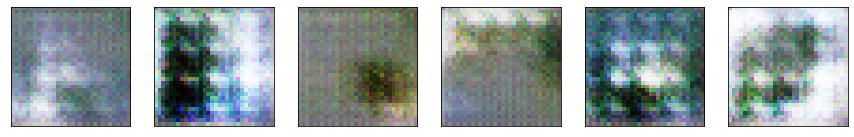

Epoch [0/100], Step[600/782], d_loss: 0.7593, g_loss: 1.4707


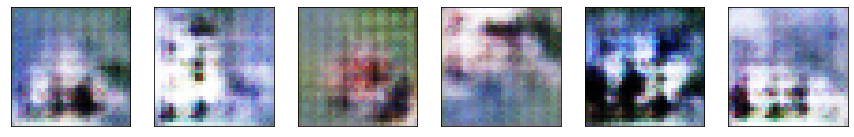

KeyboardInterrupt: ignored

In [47]:
# Binary cross entropy loss and optimizer
criterion = nn.BCELoss() # Loss func 
# generator와 discriminator 각 모델에 대해 optimizer를 설정해 준다.
g_optimizer = optim.Adam(G.parameters(), 0.0002, [0.5, 0.999]) # learning_rate=0.0002, beta1=0.5, beta2=0.999
d_optimizer = optim.Adam(D.parameters(), 0.0002, [0.5, 0.999]) # learning_rate=0.0002, beta1=0.5, beta2=0.999

fixed_z = torch.randn(6,256).cuda() # 학습이 중간중간 되고있는지 측정해준다. 측정 방식중 하나가 눈으로 확인해 보는 것. 고정된 z를 만들고, 고정된 z를 봤을 때 테스팅해보는 용도 

# Training
for epoch in range(100):
    for i, (images, _) in enumerate(trainDataLoader):
        G.train() #학습시키는게 아니라 "학습모드로 바꾼다."
        D.train() 

        # Build mini-batch dataset
        batch_size = images.size(0)
        images = images.cuda() #얻은 이미지를 gpu로 보내준다.
        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size).cuda() # batch size개 만큼의 0을 만들어준다.
        fake_labels = torch.zeros(batch_size).cuda()

        #============= Train the discriminator =============#
        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        # Second term of the loss is always zero since real_labels == 1
        outputs = D(images) # 진짜 이미지
        d_loss_real = criterion(outputs, real_labels) # Discriminator가 real image를 1(Real)로 예측하도록 학습
        real_score = outputs

        # Compute BCELoss using fake images
        # First term of the loss is always zero since fake_labels == 0
        z = torch.randn(batch_size, 256).cuda() # z를 랜덤으로 샘플링
        fake_images = G(z)
        outputs = D(fake_images) # 가짜 이미지 
        d_loss_fake = criterion(outputs, fake_labels) # Discriminator가 fake image를 0(Fake)으로 예측하도록 학습. 정답이 페이크라고 나온다. 
        fake_score = outputs

        # Backprop + Optimize
        # Quiz
        d_loss = d_loss_real + d_loss_fake
        D.zero_grad() # back prop할때 들어오는 gradient 정보를 저장하는데, 초기화 하는게 아니라 iteration마다 더해준다. 그래서 back prop 할때 초기화 시켜줘야한다. 
        d_loss.backward() #back prop
        d_optimizer.step() # discriminator_optimizer로 해주기 때문에 


        #=============== Train the generator ===============#
        # Compute loss with fake images
        z = torch.randn(batch_size, 256).cuda()  # z를 랜덤으로 샘플링
        fake_images = G(z) # z를 generator에 넣어 fake_image 생성
        outputs = D(fake_images)  

        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        g_loss = criterion(outputs, real_labels) #"fake_image지만 나는 real로 나오길 원해!"# Generator에서 생성한 fake image가 Discriminator에서 1(Real)로 예측하도록 학습

        # Backprop + Optimize
        # G랑 D 둘다 썼으니까 해주고, g_loss를 minimize시키고 싶으니까 back prop 시켜준다=backward
        G.zero_grad() 
        D.zero_grad()        
        g_loss.backward()
        g_optimizer.step()

        if (i+1) % 300 == 0: #300번에 1번씩 프린트하도록 해놓은 것
            print('======================================================================================================')
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, g_loss: %.4f' 
                  %(epoch, 100, i+1, len(trainDataLoader), d_loss.item(), g_loss.item()))
            print('======================================================================================================')
            
            G.eval() #testing 때문에 train으로 바꿨었는데 이제는 eval()로 바꿔줘야지 
            fake_images = G(fixed_z) # fake image 만들기
            fake_images = denorm(fake_images) # -1~1 scale을 0-1로 바꿔주기 
            
            images_to_show = fake_images.data.cpu().numpy().transpose((0,2,3,1)) #pytorch로 되어있는것 numpy로 바꿔주고, pytorch는 순서가 다르기때문에 transpose로 dimension 순서 바꿔주기
            images_row = images_to_show[:6] 

            plt.figure(figsize=(15,75))
            for a in range(161, 167):    
                plt.subplot(a)
                plt.imshow(images_row[a-161])
                plt.xticks([])
                plt.yticks([])
            plt.show()

## Save checkpoints

In [ ]:
torch.save(G.state_dict(),'./model/dcgan_generator.pckl')
torch.save(D.state_dict(),'./model/dcgan_discriminator.pckl')